## Stack Overflow 2021 Survey EDA
<span style="color:red">This notebook is still under development.</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

def preprocess_multiple_choice(ser,sep):
    """
    return preprocessed dataframe for multiple choice formats.
    
    a multiple choice format frequently written with the
    choices separated by separator like the following format:
    
    "choice1;choice2;choice3;"
    
    This function accepts condensed data and expands it to 
    form a sparse dataframe.
    
    Parameters
    ----------
    ser : array-like
        A Series or List containing multiple choices.
    
    sep : string
        A string that separates the multiple choices inside each ser.
    
    Examples
    --------
    >> s = pd.Series(['A;B', 'B;C', 'A;C'])
    >> preprocess_multiple_choice(s)
    |    | 0    | 1    | 2    |
    |---:|:-----|------|------|
    |  0 | A    | B    | 0    |
    |  1 | 0    | B    | 0    |
    |  2 | A    | 0    | C    |
    """
    #get the index of the largest length.
    #then build a reference list to guide where to put subsequent values
    idx = ser.str.len().sort_values(ascending=False).index[0]
    referencelist = ser[idx].split(sep)
    #place for the would-be returned df.
    dict_for_df = {}
    for index, splittedlist in ser.items():
        id = index
        sparselist = pd.Series(np.repeat(0, len(referencelist)))
        if pd.isna(splittedlist):
            dict_for_df[id] = sparselist
        else:
            splittedlist = splittedlist.split(sep)
            for word in splittedlist:
                wordindex = referencelist.index(word)
                sparselist[wordindex] = word
            dict_for_df[id] = sparselist
    return pd.DataFrame.from_dict(dict_for_df, orient='index')

In [2]:
df = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv')
df_questions = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_schema.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
def df_information(df):
    print(f'{df.shape[0]} rows, {df.shape[1]} columns, {df.size} elements')
    print(df.info())
df_information(df)

83439 rows, 48 columns, 4005072 elements
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize            

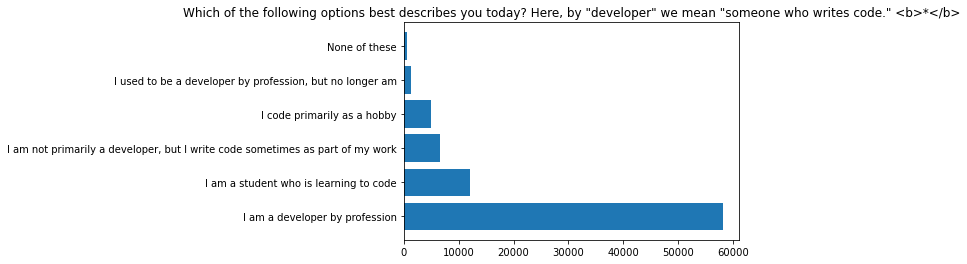

In [5]:
def quickbar(s):
    plt.barh(s.value_counts().index, s.value_counts().values)
    plt.title(df_questions[(df_questions['qname'] == s.name)]['question'].values[0])

quickbar(df['MainBranch'])

Unlike the kaggle survey respondents, stack overflow respondents has a lot of professional developers on the survey. 

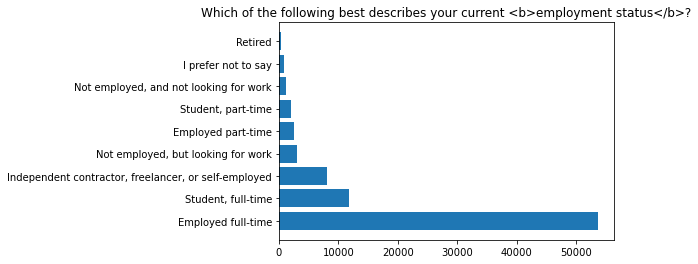

In [7]:
quickbar(df['Employment'])

still same. many of them are employed full time, rather than a student like kaggle survey.

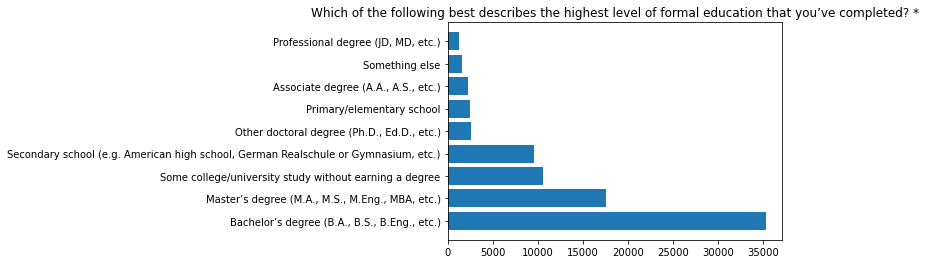

In [8]:
quickbar(df['EdLevel'])

This time the pattern repeats the kaggle survey: many of respondents hold bachelor's or a master's degree.

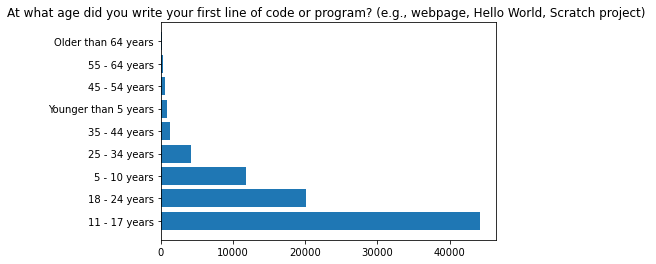

In [9]:
quickbar(df['Age1stCode'])

there are surprisingly people late in their age just starting to code. However the majority of respondents start to code in their teenage life (11-17). the number starts to dwindle after people achieved 17 years.

In [82]:
df['LearnCode'].str.split(';')

0        [Coding Bootcamp, Other online resources (ex: ...
1        [Other online resources (ex: videos, blogs, et...
2        [Other online resources (ex: videos, blogs, et...
3                                                      NaN
4                                [Friend or family member]
                               ...                        
83434    [Other online resources (ex: videos, blogs, et...
83435    [Other online resources (ex: videos, blogs, et...
83436                                             [School]
83437    [Online Courses or Certification, Books / Phys...
83438                                             [School]
Name: LearnCode, Length: 83439, dtype: object

In [96]:
#get the index of the largest length.
idx = df['LearnCode'].str.len().sort_values(ascending=False).index[0]

In [123]:
test = df.loc[:,'LearnCode'].str.split(';')
df['LearnCode'][256].split()

['Other',
 'online',
 'resources',
 '(ex:',
 'videos,',
 'blogs,',
 'etc);School;Online',
 'Forum;Colleague']

In [3]:
def preprocess_multiple_choice(ser):
    #get the index of the largest length.
    idx = ser.str.len().sort_values(ascending=False).index[0]
    #build a reference list to guide where to put subsequent values
    referencelist = ser[idx].split(';')
    #place for the would-be returned df.
    dict_for_df = {}
    for splittedlist in ser.str.split(';'):
        id = splittedlist.index
        sparselist = pd.Series(np.repeat(0, len(referencelist)))
        if splittedlist == np.nan:
            dict_for_df[id] = sparselist
        else:
            for word in splittedlist:
                wordindex = referencelist.index(word)
                sparselist[wordindex] = word
            dict_for_df[id] = sparselist
    return pd.DataFrame.from_dict(dict_for_df, orient='index')

In [18]:

preprocess_multiple_choice(df['LearnCode'],';')

,0,1,2,3,4,5,6,7,8
0,Coding Bootcamp,"Other online resources (ex: videos, blogs, etc)",0,0,0,0,0,0,0
1,0,"Other online resources (ex: videos, blogs, etc)",School,0,0,0,0,0,0
2,0,"Other online resources (ex: videos, blogs, etc)",0,Online Forum,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,Friend or family member,0,0,0,0
...,...,...,...,...,...,...,...,...,...
83434,0,"Other online resources (ex: videos, blogs, etc)",School,Online Forum,0,0,0,0,0
83435,0,"Other online resources (ex: videos, blogs, etc)",School,Online Forum,0,Online Courses or Certification,0,0,Books / Physical media
83436,0,0,School,0,0,0,0,0,0
83437,0,0,0,0,0,Online Courses or Certification,0,0,Books / Physical media


AttributeError: 'float' object has no attribute 'split'

In [165]:
for splittedlist in df['YearsCode'].str.split(';'):
    print(splittedlist)

nan
['7']
nan
nan
['17']
nan
['3']
['4']
['6']
['7']
['16']
['12']
['15']
['10']
['40']
['7']
['6']
['9']
['40']
['12']
nan
nan
['7']
['9']
['26']
['12']
['14']
['39']
['14']
['20']
['4']
['4']
['8']
['6']
['17']
['19']
['8']
['20']
['5']
['3']
['Less than 1 year']
['6']
['10']
nan
['6']
['22']
['2']
['39']
['7']
nan
['12']
['14']
['5']
['6']
['1']
['34']
['6']
['21']
['5']
['2']
['9']
['5']
['13']
['5']
['6']
['7']
['5']
['25']
['20']
['24']
['10']
['30']
['4']
['5']
['4']
['25']
['12']
['10']
nan
nan
['1']
['10']
['5']
['12']
['25']
['7']
['31']
['18']
['26']
['9']
['10']
['20']
['12']
['6']
nan
['25']
['10']
['10']
['3']
['10']
['8']
['18']
['4']
['10']
['4']
['38']
['10']
['30']
['10']
['8']
['6']
['25']
['4']
['8']
['13']
['4']
['10']
['3']
['12']
['5']
['More than 50 years']
['8']
['6']
['12']
['6']
['17']
['4']
['5']
['7']
['27']
['17']
['6']
['15']
['3']
['14']
['9']
['1']
nan
['5']
['30']
['6']
['5']
['4']
['38']
['4']
['27']
['15']
['7']
['2']
['7']
['7']
nan
['31']
['15']
['

['8']
['16']
['23']
['3']
['10']
['2']
['7']
['3']
['25']
nan
['12']
['29']
['3']
['2']
['35']
['5']
['4']
['13']
['47']
['15']
nan
['8']
['18']
['7']
['7']
['3']
['12']
nan
['12']
['16']
['3']
['26']
['13']
['5']
['Less than 1 year']
nan
nan
['5']
['8']
['10']
['2']
['10']
['5']
['36']
['6']
['2']
['18']
['10']
['15']
['23']
['13']
['12']
['42']
['2']
['20']
['7']
['13']
['15']
['4']
['30']
['2']
['21']
['8']
['15']
['6']
['5']
['8']
['18']
['10']
nan
['18']
['12']
['30']
['5']
['24']
['4']
['12']
['16']
['4']
['47']
['2']
['13']
['15']
['18']
['32']
['4']
['4']
['5']
['10']
['6']
['10']
['13']
['5']
['7']
['6']
['14']
['9']
['7']
['6']
['25']
['3']
['10']
['21']
['25']
['6']
['25']
['13']
['18']
['7']
['5']
['12']
['15']
['10']
['4']
['8']
['25']
['13']
['11']
['4']
['10']
['4']
['16']
['20']
['25']
['9']
['7']
['30']
['15']
['16']
['12']
['19']
['16']
['10']
['12']
['4']
['18']
['11']
['20']
['5']
['15']
['3']
['15']
['13']
nan
['30']
['14']
['8']
['2']
['15']
['30']
['10']
['34']
[

['41']
['10']
['6']
['6']
['41']
['15']
['5']
['25']
['9']
['19']
['3']
['15']
['9']
['10']
['19']
['14']
['5']
['11']
['3']
['3']
['5']
['31']
['6']
['3']
['4']
['10']
['5']
['8']
['18']
['11']
['3']
nan
['10']
['40']
['20']
['1']
['37']
['3']
['13']
['14']
['8']
['3']
['13']
['15']
['5']
['7']
['3']
['3']
['5']
['7']
['25']
['11']
['6']
['2']
['27']
nan
['14']
['40']
['20']
['4']
['5']
['32']
['11']
['12']
['8']
nan
['2']
['30']
['6']
['14']
['2']
['13']
['8']
['25']
['3']
['20']
['10']
['6']
['8']
['18']
['6']
['12']
['8']
nan
['26']
['1']
['27']
['8']
['21']
['7']
['4']
['14']
['25']
nan
['15']
['12']
nan
['4']
['12']
['7']
['10']
['40']
['8']
['11']
['6']
['8']
['6']
['Less than 1 year']
['11']
['40']
['5']
['7']
['12']
['14']
nan
['3']
['22']
['8']
['10']
['7']
nan
['1']
['10']
['5']
['6']
['10']
['1']
['16']
['3']
['6']
['42']
['4']
nan
['4']
['25']
['6']
['Less than 1 year']
['12']
['5']
nan
['12']
['Less than 1 year']
['9']
['1']
['15']
['32']
['10']
['7']
['7']
['14']
['6']
[

['3']
['37']
['5']
['3']
['30']
['10']
['3']
nan
['25']
['4']
['19']
['4']
['20']
['14']
['8']
['4']
['21']
['17']
['20']
['7']
['28']
['11']
['6']
['12']
['10']
['9']
['39']
['16']
['7']
['15']
nan
nan
['10']
['10']
['16']
['10']
['4']
['32']
['6']
['5']
['6']
['4']
['13']
['7']
['15']
['40']
nan
['7']
['10']
['17']
['7']
['7']
['8']
['10']
['3']
['3']
['20']
['14']
['7']
['4']
nan
['5']
['3']
['5']
['8']
['4']
['12']
['8']
['16']
['16']
['10']
['15']
['20']
['7']
['3']
['10']
['10']
['10']
['49']
['6']
['15']
['10']
['15']
['5']
['4']
['4']
['4']
['12']
['7']
['7']
['5']
['11']
['5']
['8']
['9']
['4']
nan
['20']
['30']
['5']
nan
['5']
['42']
['7']
['23']
['10']
['20']
['15']
['10']
['24']
['5']
['10']
['21']
['3']
['10']
['26']
['7']
['9']
['8']
['5']
['21']
['5']
['25']
['20']
['12']
['9']
['20']
['7']
['2']
['27']
['8']
['12']
nan
['23']
['22']
['15']
['12']
['17']
['25']
nan
['10']
['5']
['12']
['9']
['8']
['8']
['20']
['6']
['12']
['3']
['13']
['37']
['25']
['25']
['16']
['7']
['

nan
['12']
['3']
['9']
['10']
['15']
['19']
['2']
['6']
['36']
['17']
['15']
['2']
['20']
['24']
['8']
['17']
['9']
['8']
['37']
['10']
['25']
['11']
['18']
['2']
['26']
['3']
['5']
['8']
['13']
nan
['30']
['20']
['15']
['17']
['35']
['9']
['25']
['8']
['25']
['40']
['6']
['4']
['14']
['25']
nan
['12']
['6']
['8']
['13']
['17']
['20']
['6']
['10']
['7']
['8']
['7']
['8']
['14']
['5']
['13']
['7']
['8']
['12']
['6']
['7']
['5']
['10']
nan
['13']
['6']
['27']
['5']
['33']
['15']
['8']
['14']
['8']
['4']
['10']
['17']
['9']
['14']
['28']
['10']
['13']
['10']
['10']
['4']
['12']
['23']
['18']
['4']
['15']
['7']
['8']
['6']
['7']
['10']
['9']
['19']
['10']
['10']
['20']
['25']
nan
['20']
nan
['6']
['10']
['10']
['4']
['5']
['3']
['3']
['16']
['5']
['30']
['25']
['12']
nan
['8']
['8']
['39']
['18']
['14']
nan
['18']
['11']
['1']
['3']
['11']
['14']
nan
['10']
['10']
['49']
['10']
['5']
['7']
['10']
['12']
['15']
['15']
['27']
['35']
['14']
['4']
['43']
['34']
['20']
['40']
['26']
['40']
['20

['5']
['16']
['16']
['3']
['8']
['22']
['8']
['14']
nan
['4']
['10']
['38']
['23']
['16']
['6']
['12']
['9']
['12']
['8']
['5']
['More than 50 years']
['15']
['20']
['2']
['15']
['19']
['5']
['20']
['13']
['8']
['2']
['7']
['6']
['13']
['25']
['35']
['9']
['15']
['12']
['4']
['30']
nan
nan
['36']
['6']
['16']
['10']
['5']
['9']
['8']
['15']
['42']
['6']
['6']
['1']
['6']
['12']
['8']
['20']
['20']
['14']
['15']
['18']
['5']
['24']
['12']
nan
['12']
['More than 50 years']
['11']
['30']
['18']
['8']
['8']
['15']
['20']
['5']
['20']
nan
['6']
nan
['15']
['6']
['12']
['22']
['13']
['9']
['4']
['4']
['10']
['16']
['23']
['4']
['6']
['5']
['3']
['4']
['8']
['23']
['10']
['10']
['3']
nan
['9']
['17']
['12']
['3']
['20']
['8']
['17']
['8']
['7']
['9']
['15']
['25']
['20']
['7']
['18']
['15']
['6']
['11']
['15']
['4']
['5']
['8']
['8']
['34']
['4']
['8']
['10']
nan
['7']
['35']
['5']
['6']
['42']
['4']
['36']
['8']
['4']
['10']
['17']
['4']
['5']
['10']
['7']
['12']
nan
['10']
['3']
['12']
['9'

['14']
['12']
['7']
['20']
['3']
['12']
['30']
['6']
['4']
['1']
['23']
['22']
['12']
['4']
['5']
nan
['17']
['10']
['5']
['3']
['18']
['15']
['3']
['17']
nan
['25']
['20']
['20']
['27']
['14']
nan
nan
['11']
['6']
['20']
nan
['12']
['3']
['13']
['25']
['7']
['10']
['12']
['1']
nan
['6']
['35']
['7']
['8']
['7']
['15']
['17']
['1']
['6']
['15']
['5']
['6']
['30']
['5']
['14']
['4']
['10']
['12']
['10']
['17']
['11']
['15']
['11']
['8']
['2']
['5']
['12']
['30']
['4']
['6']
['17']
['8']
['6']
['12']
['5']
['3']
['4']
['9']
['10']
['6']
['23']
['10']
['Less than 1 year']
['10']
['12']
['20']
nan
['12']
['13']
['6']
['12']
['13']
['3']
['19']
['7']
['10']
['4']
['7']
['8']
['10']
['5']
['4']
['10']
['10']
['8']
['20']
['16']
['3']
['5']
['2']
['1']
['10']
['1']
['22']
['Less than 1 year']
nan
['3']
['6']
['4']
['10']
['8']
['2']
['13']
['12']
['6']
['12']
['11']
['16']
['9']
['12']
['20']
['38']
['24']
['25']
['10']
['9']
['40']
['16']
['40']
['8']
['15']
['4']
nan
nan
['9']
['14']
nan
['

['11']
['11']
['8']
['Less than 1 year']
['35']
['12']
['2']
['7']
['10']
['7']
['12']
['10']
['15']
['28']
['9']
['9']
['25']
['17']
['9']
['6']
['7']
['10']
['32']
['13']
['32']
['6']
nan
['6']
['16']
['1']
['7']
['16']
['9']
['4']
['5']
['11']
['15']
['8']
['4']
['35']
['10']
['9']
['9']
['10']
['3']
['3']
['8']
nan
['20']
['7']
['5']
['7']
['17']
['7']
['20']
['6']
['19']
['40']
['6']
nan
['4']
['6']
['45']
['8']
['14']
['10']
['20']
['7']
['3']
nan
['Less than 1 year']
['19']
['6']
['12']
['34']
['20']
['8']
['25']
['30']
['7']
['12']
['5']
['10']
['Less than 1 year']
['15']
['30']
['4']
['6']
['15']
nan
['4']
['12']
['15']
['10']
['32']
['13']
['20']
['11']
['6']
['4']
['10']
['11']
nan
['7']
['13']
['12']
['40']
['8']
['10']
nan
['15']
['5']
['4']
['11']
['15']
nan
['11']
['20']
['8']
['38']
['5']
nan
['10']
['3']
['8']
['15']
['6']
['6']
['8']
['8']
['16']
['6']
['18']
nan
['4']
['14']
['17']
['17']
['3']
['16']
['7']
['10']
['5']
['25']
['7']
['15']
nan
['30']
['8']
['3']
['7'

['30']
['18']
['13']
['32']
['1']
['13']
['11']
['13']
nan
['10']
['5']
['26']
['8']
['8']
['7']
['4']
['9']
['18']
['8']
['7']
['4']
['31']
['18']
['5']
['8']
['4']
['4']
['2']
['10']
['5']
['8']
['5']
['7']
['8']
['10']
['13']
['3']
['28']
['40']
['13']
['10']
['35']
['12']
['9']
['5']
['20']
['16']
['12']
['12']
['10']
['4']
['25']
['4']
['10']
nan
['30']
['4']
['8']
['18']
['10']
['18']
nan
['Less than 1 year']
['5']
nan
['12']
['25']
['8']
['12']
['13']
['4']
['9']
['2']
['15']
['18']
['15']
['11']
['8']
['15']
['2']
['11']
['8']
['5']
['14']
['10']
['6']
['11']
['7']
['12']
['12']
['30']
['4']
['8']
['4']
['9']
['6']
['6']
['12']
['5']
nan
['7']
['2']
['36']
['12']
['28']
['15']
['8']
['5']
['7']
['16']
['3']
['5']
['5']
['17']
['35']
['40']
['16']
['11']
['18']
['30']
['13']
['2']
['5']
nan
['5']
nan
['32']
['10']
['7']
['12']
['5']
['2']
['11']
['13']
['20']
['5']
['10']
['3']
['12']
['15']
['20']
nan
['25']
['12']
['12']
['6']
['30']
['4']
['7']
['7']
['7']
nan
nan
['22']
['4'

['8']
['5']
['12']
['7']
['10']
['14']
['26']
['10']
['6']
['12']
['35']
['27']
['11']
['10']
['6']
['21']
['11']
['5']
['45']
nan
['7']
['10']
['11']
['6']
['10']
['Less than 1 year']
['6']
['30']
['10']
['8']
['16']
['17']
['15']
['4']
nan
['20']
['4']
['8']
['10']
['10']
['8']
['20']
['10']
['34']
['17']
['8']
['10']
['8']
['3']
['Less than 1 year']
['6']
['18']
['18']
['11']
['20']
['9']
nan
['26']
['10']
['6']
['5']
['7']
['8']
['5']
['5']
['13']
['2']
['40']
['10']
['32']
['4']
['7']
['15']
['20']
['9']
['35']
['16']
['5']
nan
['30']
['6']
['14']
['13']
['16']
['38']
['8']
['2']
['25']
['2']
['7']
['7']
['12']
['7']
['12']
['7']
['4']
['25']
nan
['8']
['10']
['21']
['3']
['9']
['5']
['10']
['15']
['7']
['20']
['8']
['26']
['2']
['7']
nan
['23']
['4']
['25']
['11']
['18']
['5']
['7']
['1']
['3']
['10']
nan
['25']
['5']
['10']
['4']
['15']
nan
['26']
nan
['4']
['17']
['8']
['19']
['8']
['12']
['4']
['20']
['1']
['29']
['20']
['10']
['37']
nan
['4']
['18']
['18']
['10']
['10']
['7']

['25']
['43']
['10']
['12']
['30']
['14']
['4']
['14']
['10']
['25']
['30']
['More than 50 years']
['9']
['10']
['8']
['9']
['20']
['3']
nan
['8']
['8']
['5']
['10']
['6']
['28']
['4']
['6']
['6']
['20']
['3']
['5']
['20']
['11']
nan
nan
['14']
['15']
['15']
['20']
['1']
['6']
['5']
['3']
['7']
['6']
['20']
['18']
['5']
['5']
['27']
['4']
['14']
['14']
['30']
['36']
['10']
['8']
['6']
['6']
['10']
['5']
['24']
['8']
['25']
['10']
nan
['23']
['17']
['14']
['15']
['2']
['1']
['25']
['9']
['16']
['12']
nan
['30']
['10']
['8']
['5']
['20']
['7']
['4']
['5']
['23']
['22']
['14']
['7']
['42']
['8']
['5']
['10']
['39']
['25']
['8']
nan
['12']
['2']
['6']
['10']
['8']
['20']
nan
['7']
['9']
nan
['21']
['10']
['14']
['10']
['10']
['12']
['7']
['10']
['8']
['20']
['7']
nan
['25']
['28']
nan
['21']
['6']
['7']
['6']
['Less than 1 year']
['21']
['5']
nan
['12']
['25']
['11']
['22']
['12']
['14']
['2']
['6']
nan
['11']
['8']
['18']
['18']
['7']
['8']
['8']
['8']
['25']
['15']
nan
nan
['5']
['2']
['

['35']
['6']
nan
['43']
['3']
nan
['Less than 1 year']
['10']
['12']
['11']
['4']
['7']
['7']
['14']
['17']
['19']
['6']
['7']
['14']
['6']
['20']
['9']
['7']
['4']
['6']
['3']
['10']
['3']
['33']
['5']
['7']
['16']
['20']
['5']
['22']
['7']
['27']
['25']
['23']
['5']
['2']
['17']
['24']
['3']
['5']
['17']
['4']
['5']
['6']
['9']
['25']
['5']
['12']
['4']
['3']
['6']
['4']
['8']
['35']
['11']
['6']
['8']
['13']
['6']
['15']
['8']
['25']
['2']
['12']
['16']
['5']
['37']
['1']
['6']
['3']
['4']
['40']
['7']
['10']
['1']
['8']
['12']
['11']
['16']
['5']
['36']
['35']
['7']
['20']
['5']
['20']
['6']
['38']
['3']
['20']
['8']
['20']
['18']
['15']
['12']
['9']
['17']
['3']
['12']
['17']
['5']
['3']
['10']
['8']
['15']
['5']
['18']
['7']
['14']
['8']
['29']
['15']
['5']
['6']
['12']
['7']
['6']
['7']
['10']
['5']
['Less than 1 year']
['24']
['4']
['48']
['15']
['6']
['40']
['37']
['5']
['2']
['6']
['7']
['12']
['11']
['13']
['7']
['5']
['6']
['44']
['39']
['17']
['6']
['15']
['6']
['2']
['35'

['7']
['More than 50 years']
['24']
['24']
['3']
['4']
['19']
['15']
['10']
['6']
['6']
['9']
['7']
['28']
['7']
['22']
['8']
['24']
['Less than 1 year']
['5']
['40']
['31']
['5']
['8']
['6']
['Less than 1 year']
['9']
['4']
['12']
['31']
['7']
['13']
['8']
['16']
['10']
['40']
['3']
['30']
['12']
['20']
['3']
['30']
['13']
['13']
['3']
['2']
['6']
['18']
['10']
['7']
['24']
['4']
['36']
['12']
['10']
['6']
['15']
['9']
['3']
['8']
['16']
['23']
['10']
['12']
['3']
['5']
['5']
['15']
['11']
['6']
['6']
['9']
['6']
['6']
['6']
['9']
['15']
['7']
['4']
['21']
nan
['15']
['8']
['18']
['9']
['7']
['2']
['30']
['8']
['10']
['33']
['7']
['15']
['38']
['2']
['8']
['1']
['30']
['8']
['7']
['6']
['16']
['16']
['40']
['6']
['30']
['9']
['2']
['7']
['19']
['20']
['11']
['20']
['7']
['6']
['5']
['12']
['7']
nan
['6']
['9']
['15']
['15']
['31']
['10']
['14']
['8']
['15']
['30']
['7']
['4']
['9']
['24']
['12']
['3']
['3']
['14']
['5']
['22']
['15']
['7']
['12']
['12']
['2']
['3']
['5']
['20']
['25']

['30']
['20']
['15']
['34']
['7']
['5']
['10']
['2']
['11']
['3']
['5']
['6']
['20']
['7']
['20']
['4']
['7']
['21']
['45']
['10']
['5']
['5']
['20']
['12']
['21']
['9']
['8']
['3']
['11']
['11']
['39']
['10']
['2']
['29']
['37']
['9']
['11']
['10']
['8']
['7']
['5']
['10']
['17']
['14']
['4']
['16']
['4']
['18']
['10']
['15']
['4']
['10']
['3']
['10']
['14']
['3']
['7']
['40']
['3']
['16']
['24']
['5']
['9']
['38']
['10']
['2']
['7']
['11']
['7']
['12']
['10']
['18']
['5']
['4']
['2']
['21']
['Less than 1 year']
['32']
['8']
['5']
['6']
['23']
['4']
['15']
['6']
['4']
['5']
['17']
['22']
['18']
['15']
['4']
['8']
['15']
['10']
['15']
['17']
['18']
['9']
['6']
['3']
['14']
['12']
['46']
['10']
['14']
['6']
['4']
['50']
['20']
['Less than 1 year']
['5']
['30']
['15']
['12']
['14']
['17']
['1']
['13']
['4']
['20']
['22']
['7']
['25']
['11']
['9']
['15']
['10']
['27']
['37']
['20']
['38']
['17']
['8']
['13']
['4']
['6']
['7']
['4']
['7']
['12']
['7']
['8']
['6']
['7']
['8']
['3']
['1']
['

['10']
['8']
['2']
['7']
['6']
['15']
['6']
['40']
['23']
['28']
['15']
['8']
['4']
['25']
['21']
['38']
['35']
['4']
['8']
['8']
['20']
['38']
['11']
['17']
['5']
['8']
['9']
['25']
['42']
['10']
['25']
['7']
['8']
['6']
['13']
['7']
['10']
['35']
['20']
['7']
['3']
['6']
['7']
['20']
['24']
['10']
['4']
['23']
['7']
['23']
['45']
['6']
['12']
['10']
['8']
['Less than 1 year']
['7']
['8']
['45']
['12']
['4']
['21']
['Less than 1 year']
['15']
['20']
['13']
['3']
['22']
['20']
['20']
['2']
['40']
['15']
['3']
['12']
['10']
['17']
['17']
['5']
['26']
['4']
['15']
['8']
['12']
['10']
['10']
['15']
['5']
['15']
['10']
['2']
['11']
['9']
['4']
['8']
['18']
['5']
['4']
['4']
['2']
['9']
['9']
['3']
['16']
['12']
['2']
['5']
['7']
['6']
['20']
['3']
['26']
['10']
['21']
['5']
['7']
['3']
['25']
['25']
['26']
['21']
['8']
['7']
['21']
['40']
['13']
['6']
['40']
['6']
['5']
['8']
['6']
['9']
['10']
['31']
['1']
['16']
['4']
['9']
['16']
['20']
['10']
['12']
['6']
['5']
['12']
['25']
['30']
['8

['23']
['30']
['8']
['8']
['20']
['20']
['22']
['6']
['40']
['4']
['6']
['17']
['14']
['12']
['3']
['38']
['5']
['11']
['42']
['12']
['40']
['7']
['21']
['2']
['34']
['38']
['5']
['3']
['17']
['12']
['37']
['24']
['7']
['18']
['23']
['11']
['7']
['27']
['5']
['10']
['23']
['Less than 1 year']
['40']
['4']
['10']
['17']
['9']
['12']
['7']
['5']
['16']
['3']
['21']
['6']
['7']
['15']
['10']
['9']
['10']
['11']
['35']
['6']
['5']
['8']
['6']
['15']
['1']
['10']
['25']
['11']
['16']
['8']
['5']
['20']
['15']
['29']
['12']
['9']
['21']
['33']
['3']
['12']
['13']
['37']
['6']
['16']
['18']
['14']
['35']
['10']
['17']
['9']
['12']
['Less than 1 year']
['12']
['30']
['9']
['20']
['3']
['11']
['1']
['6']
['6']
['5']
['9']
['2']
['6']
['6']
['20']
['7']
['20']
['7']
['16']
['20']
['10']
['22']
['2']
['10']
['45']
['5']
['14']
['8']
['30']
['6']
['35']
['5']
['10']
['30']
['3']
['40']
['20']
['40']
['3']
['14']
['10']
['10']
['6']
['20']
['20']
['10']
['13']
['16']
['11']
['17']
['10']
['7']
['7'

['7']
['23']
['20']
['39']
['15']
['18']
['26']
['15']
['22']
['25']
['30']
['24']
['26']
['6']
['21']
['20']
['3']
['12']
['35']
['10']
['3']
['6']
['5']
['7']
['7']
['6']
['15']
['7']
['14']
['4']
['25']
['16']
['21']
['26']
['20']
['8']
['22']
['20']
['40']
['8']
['2']
['20']
['40']
['30']
['2']
['26']
['1']
['6']
['28']
['6']
['15']
['48']
['6']
['8']
['5']
['12']
['1']
['4']
['25']
['14']
['2']
['9']
['38']
['4']
['20']
['20']
['30']
['4']
['9']
['25']
['10']
['7']
['14']
['12']
['8']
['13']
['3']
['6']
['20']
['19']
['6']
['11']
['5']
['45']
['25']
['22']
['3']
['13']
['30']
['7']
['6']
['34']
['16']
['30']
['8']
['18']
['8']
['3']
['25']
['15']
['3']
['10']
['5']
['8']
['6']
['3']
['45']
['30']
['21']
['15']
['40']
['25']
['4']
['22']
['17']
['20']
['36']
['5']
['17']
['7']
['7']
['15']
['17']
['13']
['16']
['4']
['10']
['7']
['26']
['20']
['6']
['7']
['3']
['40']
['22']
['3']
['6']
['7']
['20']
['20']
['36']
['10']
['45']
['15']
['5']
['15']
['20']
['35']
['7']
['7']
['37']
['2

['10']
['17']
['8']
['17']
['14']
['35']
['18']
['24']
['6']
['15']
['7']
['12']
['27']
['30']
['Less than 1 year']
['3']
['17']
['3']
['9']
['20']
['7']
['10']
['5']
['Less than 1 year']
['1']
['5']
['16']
['25']
['3']
['16']
['15']
['30']
['18']
['14']
['8']
['15']
['6']
['14']
['11']
['8']
['17']
['11']
['13']
nan
['40']
['4']
['8']
['5']
['7']
['4']
['5']
['8']
['20']
['7']
['7']
['43']
['38']
['2']
['3']
['42']
['20']
['5']
['6']
['More than 50 years']
['40']
['15']
['11']
['10']
['18']
['6']
['5']
['25']
['14']
['1']
nan
nan
['3']
['5']
['15']
['6']
['4']
['25']
['11']
['20']
['7']
['6']
['10']
['4']
['5']
['41']
['15']
['46']
['20']
['4']
['2']
nan
['15']
['23']
['16']
['7']
['7']
['7']
['4']
['27']
['4']
['6']
['12']
['15']
['16']
['3']
['5']
['2']
['10']
['5']
['30']
['4']
['6']
['3']
['5']
['35']
['20']
['7']
['10']
['4']
['12']
['6']
['40']
['40']
['6']
['30']
['6']
['2']
['10']
['8']
['16']
['9']
['25']
['40']
['8']
['2']
['7']
['27']
['9']
['12']
['1']
['6']
['47']
['6']
[

['13']
['4']
['5']
['7']
['8']
['4']
['20']
['9']
['7']
['10']
['5']
['13']
['6']
['5']
['9']
['25']
['10']
['10']
['7']
['21']
['7']
['2']
['4']
['6']
['5']
['18']
['6']
['7']
['18']
['8']
['20']
['6']
nan
['15']
['8']
['3']
['32']
['25']
['23']
['17']
['24']
['7']
['10']
['9']
['4']
['1']
['8']
['12']
['5']
['10']
['4']
['10']
['4']
['3']
['17']
['21']
['6']
['39']
['3']
['10']
['18']
['9']
['5']
['10']
['30']
['20']
['19']
['27']
['15']
['3']
['2']
['29']
['9']
['Less than 1 year']
['3']
['9']
['5']
['10']
['14']
['14']
['5']
['24']
['2']
['11']
['9']
['14']
['36']
['19']
['4']
['38']
['4']
['5']
['16']
['20']
['11']
['14']
['15']
nan
['9']
['9']
['7']
['15']
['25']
['3']
['3']
['7']
['3']
['2']
['15']
['2']
['6']
['8']
['13']
['15']
['15']
['4']
['6']
['33']
['5']
['25']
['Less than 1 year']
['16']
['6']
['7']
['31']
['1']
['7']
['5']
['21']
['8']
['25']
['10']
['4']
['12']
['10']
['16']
['15']
['31']
['10']
['17']
['7']
['4']
['20']
['25']
['5']
['4']
['2']
['10']
['4']
['37']
['1

['39']
['1']
['8']
['16']
['3']
['8']
['7']
['5']
['Less than 1 year']
['15']
['10']
['9']
['1']
['5']
['21']
['6']
['30']
['11']
['23']
['11']
['2']
['50']
['7']
['20']
['13']
['15']
['3']
['2']
nan
['3']
['5']
['12']
['6']
['7']
['6']
['23']
['16']
['1']
['4']
['2']
['5']
['7']
['15']
['7']
['4']
['17']
['7']
['11']
['10']
['5']
['12']
['6']
['23']
['8']
['5']
['35']
['5']
['40']
['6']
['6']
['6']
['10']
['11']
['38']
['25']
['29']
['25']
['16']
['9']
['6']
['3']
['3']
['10']
['12']
['12']
['30']
['5']
['13']
['12']
['35']
['9']
['14']
['11']
['30']
['30']
['4']
['1']
['9']
['5']
['15']
['40']
['5']
['16']
['2']
['15']
['5']
['3']
['1']
['5']
['38']
['23']
['11']
['4']
['3']
['3']
['4']
['1']
['17']
['4']
['8']
['6']
['5']
['2']
['7']
['7']
['16']
['1']
['22']
['4']
['3']
['35']
['5']
['4']
['7']
['2']
['10']
['16']
['7']
['7']
['10']
['15']
['11']
['33']
['4']
['35']
['6']
['4']
['6']
['10']
['6']
['20']
['2']
['25']
['42']
['6']
['8']
['5']
['25']
['15']
['5']
['2']
['7']
['5']
['6

['4']
['24']
['3']
['6']
['18']
['10']
['7']
['5']
['3']
['6']
['9']
['Less than 1 year']
['17']
['23']
['4']
['10']
['4']
['4']
['1']
['13']
['8']
['5']
['44']
['22']
['4']
['3']
['16']
['6']
['3']
['10']
['8']
['30']
nan
['45']
['5']
['6']
['10']
['11']
['3']
['10']
['6']
['12']
['6']
['20']
['21']
['8']
['35']
['5']
['4']
['4']
['3']
['8']
['12']
['22']
['25']
['7']
['1']
['12']
['6']
['8']
['1']
['8']
['8']
['Less than 1 year']
['25']
['6']
['10']
['6']
['20']
['23']
['11']
['10']
['8']
['40']
['3']
['30']
['36']
['12']
['8']
['10']
['37']
['15']
['12']
['4']
['6']
['5']
['Less than 1 year']
['2']
['6']
['7']
['18']
['12']
['14']
['14']
['30']
['30']
['10']
['10']
['3']
['15']
['10']
['7']
['25']
['25']
['11']
['6']
['11']
['20']
['6']
['18']
['18']
['7']
['6']
['2']
['1']
['13']
['10']
['20']
['27']
['4']
['1']
['7']
['3']
['16']
['4']
['12']
['3']
['2']
['6']
['7']
['15']
['15']
['30']
['4']
nan
['4']
['13']
['20']
['18']
['6']
['13']
['6']
['10']
['4']
['10']
['12']
['15']
['14'

['10']
['Less than 1 year']
['13']
['6']
['4']
['18']
['4']
['3']
['9']
['1']
['3']
['1']
['15']
['10']
['6']
['3']
['27']
['15']
['7']
['8']
['10']
['5']
['8']
['4']
['5']
['42']
['20']
['6']
['30']
['6']
['25']
['12']
['12']
['20']
['10']
['10']
['5']
['14']
['6']
['6']
['6']
['4']
['Less than 1 year']
['8']
['2']
['8']
['2']
['6']
['10']
['Less than 1 year']
['13']
['6']
['5']
['18']
['6']
['8']
['6']
['10']
['10']
['12']
['7']
['4']
['5']
['11']
['2']
['9']
['9']
['22']
['2']
['14']
['40']
['5']
['10']
['4']
['17']
['11']
['40']
['22']
['4']
['2']
['9']
['46']
['7']
['13']
['19']
['4']
['30']
['15']
['4']
['10']
['6']
['Less than 1 year']
['15']
['2']
['Less than 1 year']
['35']
['9']
['1']
['37']
['7']
['5']
['13']
['Less than 1 year']
['13']
['4']
['10']
['7']
['13']
['7']
['6']
['4']
['3']
['9']
['3']
['4']
['10']
['4']
['4']
['2']
['16']
['14']
['9']
['7']
['35']
['12']
['6']
['4']
['33']
['10']
['4']
['9']
['10']
['6']
['23']
['12']
['12']
['30']
nan
['2']
['3']
['10']
['33']


['4']
['7']
['6']
['30']
['11']
['2']
['11']
['2']
['7']
['32']
['1']
['5']
['2']
['21']
['8']
['8']
['5']
['12']
['38']
['4']
['3']
['20']
['36']
['17']
['5']
['4']
['6']
['10']
['3']
['5']
['11']
['43']
['12']
['42']
['4']
['12']
['14']
['7']
['15']
['10']
['10']
['4']
['7']
['2']
['10']
['7']
['16']
['13']
['2']
['2']
['4']
['5']
['4']
['2']
['3']
['2']
['13']
['1']
['4']
['4']
['17']
['7']
['Less than 1 year']
['32']
['12']
['13']
['1']
['17']
['3']
['1']
['Less than 1 year']
['8']
['4']
['13']
['5']
['20']
['2']
['15']
['23']
['3']
['5']
['1']
['9']
['15']
['37']
['5']
['2']
['40']
['7']
['10']
['12']
['7']
['5']
['12']
['20']
['3']
['7']
['4']
['7']
['3']
['12']
['9']
['Less than 1 year']
['11']
['17']
['5']
['47']
['9']
['3']
['Less than 1 year']
['7']
['9']
['40']
['7']
['39']
['8']
['7']
['4']
['3']
['6']
['7']
['10']
['3']
['2']
['Less than 1 year']
['6']
['16']
['3']
['7']
['5']
['More than 50 years']
['12']
['2']
['3']
['8']
['19']
['13']
['9']
['6']
['2']
['7']
['11']
['30

['1']
['5']
['25']
['22']
['6']
['25']
['5']
['6']
['15']
['11']
['6']
['45']
nan
['15']
['18']
['15']
['18']
['30']
['12']
['1']
['12']
['10']
['5']
['8']
['10']
['6']
['8']
['6']
['19']
['30']
['12']
['4']
['16']
['4']
['20']
['11']
['4']
['1']
['7']
['15']
['20']
['7']
['4']
['17']
['2']
['3']
['20']
['10']
['5']
['35']
['7']
['6']
['8']
['Less than 1 year']
['17']
['6']
['10']
['6']
['15']
['4']
['2']
['6']
['12']
['1']
['6']
['10']
['5']
['3']
['6']
['7']
['4']
['23']
['18']
['4']
['8']
['7']
['7']
['6']
['20']
['15']
['7']
['6']
['10']
['6']
['11']
['5']
['13']
['17']
['6']
['15']
['14']
['7']
['18']
['5']
['16']
['7']
['6']
['19']
['7']
['2']
['18']
['14']
['14']
['10']
['17']
['28']
['12']
['10']
['4']
['37']
['10']
['10']
['11']
['18']
['15']
['8']
['9']
['3']
['10']
['12']
['16']
['5']
['30']
['14']
['Less than 1 year']
['10']
['2']
['15']
['12']
['4']
['7']
['46']
['11']
['30']
['5']
['20']
['17']
['9']
['8']
['20']
['15']
['16']
['7']
['6']
['8']
['22']
['12']
['12']
['21']

['10']
['15']
['6']
['5']
['6']
['5']
['4']
['40']
['23']
['5']
['20']
['4']
['10']
['8']
['5']
['5']
['3']
['6']
['6']
['2']
['4']
['3']
['4']
['3']
['11']
['8']
['38']
['2']
['2']
['14']
['20']
['7']
['11']
['10']
['4']
nan
['Less than 1 year']
['20']
['2']
['7']
['1']
['3']
['9']
['14']
['10']
['27']
['2']
['12']
['10']
['15']
['14']
['40']
['11']
nan
['17']
['25']
['5']
['19']
['3']
['21']
['3']
['3']
['4']
['4']
['6']
['40']
['20']
['5']
['Less than 1 year']
['12']
['21']
['10']
['3']
['12']
['10']
['22']
['4']
['15']
['15']
['5']
['25']
['7']
['2']
['7']
['4']
['More than 50 years']
['20']
['25']
['25']
['4']
['27']
['7']
['21']
['8']
['20']
['12']
['6']
['8']
['17']
['4']
['9']
['30']
['26']
['4']
['19']
['40']
['25']
['19']
['22']
['25']
['12']
['7']
['40']
['35']
['20']
['33']
['17']
['7']
['1']
['6']
['2']
['15']
['3']
['20']
['15']
['6']
['6']
['37']
['12']
['12']
['18']
['8']
['27']
['21']
['9']
['7']
['39']
['3']
['5']
['14']
['3']
['8']
['21']
['8']
['7']
['6']
['12']
['1

['5']
['25']
['8']
['9']
['7']
['15']
['Less than 1 year']
['4']
['5']
['1']
['11']
['3']
['4']
['15']
['17']
['14']
['Less than 1 year']
['6']
['16']
['6']
['13']
['40']
['10']
['24']
['3']
['10']
['5']
['35']
['4']
['12']
['4']
['46']
['13']
['27']
['15']
['22']
['3']
['38']
['10']
['1']
['7']
['2']
['11']
['4']
['5']
['11']
['14']
['4']
['20']
['15']
['9']
['7']
['16']
['7']
['4']
['17']
['10']
['8']
['12']
['8']
['30']
['10']
['20']
['6']
['10']
['6']
['5']
['30']
['10']
['24']
['9']
['10']
['20']
['17']
['7']
['7']
['6']
['20']
['6']
['4']
['25']
['6']
['Less than 1 year']
['12']
['7']
['25']
['5']
['Less than 1 year']
['30']
['17']
['14']
['3']
['10']
['15']
['15']
['2']
['12']
['12']
['7']
['5']
['12']
['25']
['8']
['5']
['25']
['13']
['5']
['4']
['2']
['25']
['12']
['19']
['7']
['30']
['12']
['15']
['20']
['20']
['20']
['7']
nan
['9']
['15']
['10']
['10']
['10']
['20']
['5']
['16']
['4']
['10']
['Less than 1 year']
['15']
['6']
['4']
['5']
['19']
['15']
['21']
['3']
['6']
['7']

['9']
['23']
['2']
['7']
['25']
['34']
['15']
['3']
['3']
['5']
['20']
['7']
['13']
['20']
['35']
['19']
['7']
['18']
['5']
['17']
['22']
['13']
['39']
['25']
['3']
['17']
['18']
['18']
['18']
['7']
['12']
['3']
['2']
['2']
['30']
['12']
['4']
['10']
['8']
['20']
['16']
['34']
['15']
['40']
['6']
['34']
['2']
['11']
['4']
nan
['36']
['8']
['22']
['48']
['6']
['3']
['7']
['10']
['15']
['23']
['10']
['10']
['24']
['9']
['1']
['24']
['14']
['25']
['8']
['7']
['25']
['2']
['5']
['8']
['30']
['5']
['1']
['3']
['10']
['9']
['7']
['20']
['25']
['24']
['1']
['1']
['12']
['5']
['6']
['7']
['13']
['14']
['25']
['5']
['18']
['30']
['5']
['15']
['37']
['10']
['4']
['15']
['5']
['5']
['8']
['7']
['3']
['40']
['7']
['4']
['1']
['20']
['15']
['4']
['10']
['30']
['20']
['7']
['12']
['7']
['8']
['5']
['14']
['10']
['20']
['4']
['12']
['2']
['2']
['12']
['3']
['8']
['30']
['2']
['20']
['10']
['3']
['2']
['4']
['12']
['6']
['5']
['28']
['8']
['25']
['23']
['4']
['4']
['14']
['1']
['18']
['25']
['12']
['3

['25']
['5']
['26']
['8']
['7']
['10']
['4']
['20']
['19']
['3']
['14']
['19']
['20']
['10']
['10']
['10']
['13']
['16']
['15']
['41']
['10']
['10']
['Less than 1 year']
['10']
['20']
['18']
['35']
['Less than 1 year']
['10']
['34']
['30']
['10']
['4']
['8']
['2']
['7']
['9']
['15']
['12']
['12']
['8']
['9']
['10']
['6']
['6']
['26']
['12']
['7']
['8']
['9']
['11']
['11']
['13']
['26']
['12']
['20']
['10']
['8']
['3']
['17']
['7']
['23']
['10']
['13']
['8']
['12']
['20']
['8']
['35']
['24']
['4']
['7']
['5']
['30']
['19']
['8']
['16']
['7']
['19']
['20']
['7']
['1']
['14']
['Less than 1 year']
['8']
['14']
['17']
['15']
['15']
['16']
['22']
['20']
['30']
['16']
['18']
['9']
['13']
['9']
['3']
['9']
['45']
['2']
['14']
['12']
['23']
['20']
['10']
['13']
['31']
['9']
['10']
['Less than 1 year']
['13']
['5']
['3']
['10']
['16']
['40']
['20']
['15']
['9']
['13']
['17']
['13']
['12']
['6']
['9']
['20']
['6']
['2']
['18']
['25']
['16']
['6']
['11']
['1']
['21']
['11']
['20']
['15']
['9']
['L

['10']
['8']
['45']
['10']
['8']
['12']
['8']
['8']
['12']
['3']
['9']
['6']
['15']
['15']
['4']
['1']
['7']
['18']
['28']
['6']
['11']
['6']
['11']
['20']
['15']
['33']
['11']
['6']
['4']
['2']
['3']
['20']
['50']
['3']
['14']
['17']
['39']
['10']
['15']
['13']
['1']
['20']
['5']
['26']
['3']
['8']
['8']
['5']
['41']
['1']
['15']
['6']
['7']
['28']
['1']
['25']
['4']
['12']
['17']
['21']
['40']
['20']
['6']
['10']
['8']
['20']
['3']
['10']
['3']
['8']
['5']
['17']
['21']
['11']
['13']
['20']
['14']
['36']
['33']
['12']
['44']
['13']
['25']
['30']
['25']
['14']
['15']
['6']
['1']
['3']
['11']
['2']
['5']
['20']
['14']
['11']
['40']
['7']
['6']
['More than 50 years']
['7']
['24']
['18']
['16']
['35']
['16']
['15']
['25']
['5']
['11']
['38']
['27']
['13']
['8']
['12']
['15']
['4']
['16']
['25']
['25']
['13']
['12']
['16']
['6']
['12']
['15']
['17']
['15']
['26']
['13']
['8']
['15']
['14']
['30']
['35']
['2']
['6']
['5']
['8']
['15']
['30']
['6']
['9']
['29']
['10']
['6']
['23']
['40']
['

['5']
['12']
['13']
['25']
['10']
['38']
['36']
['33']
['37']
['20']
['19']
['5']
['1']
['5']
['35']
['8']
['7']
['8']
['12']
['6']
['15']
['44']
['12']
['7']
['11']
['8']
['5']
['9']
['11']
['17']
['13']
['30']
['11']
['4']
['23']
['15']
['20']
['42']
['35']
['5']
['12']
['25']
['2']
['5']
['45']
['14']
['Less than 1 year']
['22']
['38']
['25']
['17']
['25']
['17']
['32']
['12']
nan
['49']
['11']
['40']
['2']
['2']
['12']
['6']
['18']
['11']
['25']
['45']
['6']
['7']
['12']
['3']
['9']
['9']
['5']
['34']
['2']
['11']
['8']
['10']
['Less than 1 year']
['25']
['38']
['41']
['2']
['15']
['3']
['21']
['24']
['8']
['23']
['10']
['12']
['4']
['13']
['20']
['6']
['20']
['7']
['39']
['3']
['10']
['21']
['17']
['10']
['39']
['43']
['12']
['15']
['7']
['11']
['40']
['8']
['23']
['1']
['10']
['5']
['19']
['10']
['45']
['Less than 1 year']
['8']
['Less than 1 year']
['21']
['37']
['12']
['11']
['41']
['3']
['Less than 1 year']
['12']
['8']
['14']
['20']
['25']
['9']
['41']
['17']
['6']
['29']
['1

['10']
['4']
['9']
['34']
['10']
['3']
['20']
['15']
['1']
['8']
['1']
['6']
['10']
['39']
['25']
['23']
['20']
['14']
['9']
['6']
['20']
['13']
['2']
['9']
['4']
['8']
['12']
['11']
['6']
['5']
['10']
['7']
['3']
['7']
['8']
['5']
['10']
['15']
['3']
['1']
['2']
['20']
['40']
['25']
['8']
['25']
['4']
['6']
['10']
['7']
['7']
['4']
['1']
['13']
['10']
['12']
['1']
['8']
['26']
['4']
['21']
['43']
['More than 50 years']
['9']
['11']
['12']
['26']
['7']
['Less than 1 year']
['5']
['35']
['29']
['20']
['11']
['20']
['7']
['24']
['8']
['15']
['10']
['1']
['27']
['12']
['3']
['More than 50 years']
['7']
['7']
['5']
['5']
['5']
['9']
['9']
['10']
['7']
['6']
['8']
['4']
['10']
['12']
['10']
['40']
['5']
['1']
['17']
['17']
['7']
['9']
['12']
['4']
['8']
['20']
['5']
['6']
['2']
['9']
['17']
['Less than 1 year']
['5']
['15']
['3']
['10']
['7']
['16']
['8']
['11']
['Less than 1 year']
['Less than 1 year']
['5']
['Less than 1 year']
['8']
['3']
['5']
['6']
['15']
['38']
['20']
['5']
['19']
['1

['17']
['20']
['2']
['43']
['16']
['8']
['27']
['10']
['6']
['7']
['35']
['5']
['3']
['15']
['8']
['2']
['8']
['37']
['40']
['4']
['6']
['6']
['17']
['15']
['13']
['19']
['13']
['4']
['22']
['2']
['32']
['35']
['10']
['3']
['1']
['16']
['24']
['39']
['12']
['4']
['18']
['15']
['15']
['13']
['7']
['4']
['37']
['10']
['3']
['14']
['4']
['9']
['33']
['9']
['3']
['7']
['16']
['7']
['19']
['7']
['5']
['4']
['15']
['8']
['6']
['42']
['9']
['7']
['30']
['33']
['8']
['8']
['13']
['10']
['6']
['6']
['8']
['35']
['10']
['21']
['10']
['38']
['7']
['13']
['5']
['6']
['24']
['6']
['21']
['6']
['31']
['3']
['8']
['Less than 1 year']
['15']
['37']
['26']
['35']
['10']
['4']
['5']
['41']
['8']
['33']
['16']
['1']
['32']
['16']
['9']
['9']
['5']
['18']
['2']
['23']
['8']
['37']
['7']
['4']
['24']
['3']
['9']
['14']
['20']
['3']
['20']
['5']
['4']
['5']
['6']
['27']
['15']
['5']
['23']
['9']
['6']
['7']
['25']
['39']
['Less than 1 year']
nan
['22']
['25']
['33']
['30']
['18']
['8']
['15']
['6']
['30']
[

['25']
['9']
['20']
['35']
['10']
['12']
['2']
['2']
['9']
['7']
['20']
['27']
['29']
['11']
['10']
['8']
['2']
['14']
['14']
['5']
['35']
['7']
['15']
['20']
['8']
['1']
['11']
['8']
['7']
['22']
['25']
['35']
['15']
['15']
['10']
['2']
['Less than 1 year']
['17']
['5']
['19']
['6']
['17']
['10']
['8']
['11']
['11']
['2']
['6']
['2']
['9']
['5']
nan
['6']
['10']
['8']
['4']
['22']
['4']
['Less than 1 year']
['10']
['25']
['4']
['3']
['2']
['15']
['6']
['20']
['15']
['3']
['20']
['23']
['3']
['2']
['7']
['8']
['8']
['21']
['7']
['6']
['14']
['2']
['9']
['20']
['1']
['14']
['14']
['7']
['11']
['37']
['15']
['30']
['20']
['25']
['6']
['11']
['6']
['22']
['20']
['21']
['28']
['6']
['7']
['9']
['20']
['9']
['40']
['3']
['3']
['10']
['11']
['13']
['40']
['14']
['11']
['14']
['10']
['20']
['18']
['30']
['20']
['15']
['18']
['12']
['6']
['6']
['11']
['7']
['8']
['27']
['10']
['12']
['20']
['20']
['13']
['10']
['2']
['12']
['7']
['5']
['7']
['25']
['8']
['2']
['4']
['Less than 1 year']
['8']
[

['14']
['15']
['39']
['8']
['13']
['12']
['12']
['12']
['15']
['9']
['16']
['16']
['23']
['45']
['34']
['5']
['22']
['25']
['21']
['10']
['24']
['9']
['10']
['10']
['5']
['38']
['4']
['20']
['15']
['5']
['15']
['10']
['31']
['23']
['6']
['5']
['2']
['16']
['40']
['23']
['7']
['4']
['31']
['7']
['6']
['13']
['25']
['15']
['20']
['20']
['9']
['25']
['5']
['More than 50 years']
['10']
['20']
['12']
['3']
['8']
['8']
['12']
['3']
['3']
['8']
['2']
['Less than 1 year']
['10']
['15']
['13']
['8']
['10']
['33']
['5']
['2']
['12']
['16']
['3']
['1']
['44']
['30']
['25']
['20']
['3']
['35']
['3']
['14']
['4']
['12']
['2']
['Less than 1 year']
['14']
['10']
['11']
nan
['8']
['6']
['14']
['14']
['4']
['20']
['23']
['5']
['39']
['2']
['21']
['34']
['4']
['10']
['5']
['7']
['9']
['8']
['12']
['10']
['4']
['14']
['8']
['4']
['23']
['6']
['20']
['10']
['5']
['4']
['6']
['29']
['8']
['11']
['6']
['3']
['2']
['35']
['15']
['11']
['7']
['36']
['4']
['12']
['4']
['15']
['5']
['10']
['13']
['4']
['15']
['

['2']
['5']
['20']
['20']
['2']
['2']
['8']
['25']
['23']
['36']
['45']
['8']
['44']
['2']
['22']
['3']
['4']
['7']
['4']
['10']
['6']
['35']
['3']
['3']
['8']
['37']
['Less than 1 year']
['18']
['20']
['2']
['18']
['10']
['14']
['5']
['20']
['18']
['Less than 1 year']
['20']
['35']
['14']
['42']
['3']
['6']
['9']
['1']
['2']
['6']
['8']
['40']
['11']
['2']
['26']
['21']
['4']
['10']
['5']
['9']
['2']
['2']
['25']
['21']
['5']
['25']
['3']
['30']
['15']
['18']
['5']
['5']
['18']
['15']
['12']
['3']
['8']
['15']
['6']
['35']
['15']
['Less than 1 year']
['21']
['6']
['3']
['18']
['2']
['2']
['13']
['3']
['10']
['1']
['25']
['3']
['20']
['1']
['Less than 1 year']
['15']
['7']
['4']
['2']
['6']
['3']
['40']
['15']
['10']
['9']
['4']
['5']
['3']
['6']
['18']
['24']
['2']
['15']
['20']
['13']
['30']
['3']
['24']
['37']
['6']
['37']
['10']
['5']
['4']
['14']
['21']
nan
['3']
['8']
['8']
['18']
['5']
['8']
['4']
['22']
['2']
['2']
['9']
['30']
['8']
['7']
['7']
['1']
['5']
['10']
['10']
['14']

['14']
['Less than 1 year']
['5']
['5']
['10']
['1']
['30']
['5']
['35']
['10']
['10']
['5']
['17']
['2']
['3']
['2']
['2']
['3']
['7']
['6']
['1']
['7']
['24']
['11']
['24']
['19']
['28']
['10']
['Less than 1 year']
['5']
['4']
['16']
['12']
['4']
['1']
['7']
['30']
['7']
['5']
['12']
['4']
['1']
['2']
['18']
['10']
['9']
['7']
['11']
['6']
['7']
['6']
['8']
['8']
['7']
['12']
['35']
['15']
['7']
['4']
['3']
['4']
['15']
['5']
['4']
['7']
['8']
['4']
['9']
['5']
['3']
['6']
['7']
['2']
['11']
['43']
['2']
['10']
['2']
['32']
['25']
['7']
['5']
['13']
['2']
['5']
['18']
['11']
['14']
['3']
['2']
['7']
['3']
['7']
['25']
['5']
['5']
['5']
['29']
['9']
['Less than 1 year']
['20']
['26']
['3']
['4']
['8']
['Less than 1 year']
['6']
['2']
['14']
['Less than 1 year']
['5']
['4']
['Less than 1 year']
['Less than 1 year']
['14']
['35']
['8']
['Less than 1 year']
['40']
['8']
['1']
['4']
['2']
['8']
['2']
['15']
['7']
['10']
['36']
['15']
['1']
['25']
['3']
['15']
['16']
['3']
['8']
['15']
['1

['8']
['3']
['19']
['7']
['8']
['7']
['12']
['3']
['30']
['18']
['18']
['23']
['15']
['28']
['3']
['8']
['15']
['10']
['5']
['5']
['15']
['7']
['5']
['30']
['23']
['10']
['20']
['6']
['9']
['7']
['9']
['8']
nan
['5']
['4']
['42']
['20']
['3']
['2']
['1']
['10']
['6']
['Less than 1 year']
['10']
['3']
['4']
['11']
['15']
['25']
['10']
['Less than 1 year']
['10']
['14']
['21']
['23']
['8']
['18']
['4']
['18']
['4']
['5']
['10']
['36']
['25']
['11']
['8']
['4']
['20']
['3']
['7']
['5']
['3']
['15']
['8']
['5']
['10']
['18']
['20']
['2']
['20']
['7']
['15']
['6']
['5']
['8']
['10']
['7']
['5']
['7']
['7']
['3']
['8']
['12']
['25']
['20']
['15']
['4']
['14']
['4']
['8']
['10']
['3']
['Less than 1 year']
['5']
['20']
['6']
['10']
['6']
['9']
['5']
['8']
['3']
['8']
['3']
['8']
['37']
['21']
['15']
['30']
nan
['1']
['21']
['6']
['9']
['40']
['5']
['19']
['8']
['2']
['5']
['1']
['3']
['2']
['4']
['4']
['4']
['10']
['10']
['5']
['10']
['6']
['10']
['6']
['12']
['3']
['3']
['20']
['2']
['30']
['

['27']
['6']
['12']
['10']
['4']
['39']
['10']
['9']
['8']
['28']
['32']
['10']
['39']
nan
['14']
['2']
['50']
['40']
['25']
['3']
['17']
['11']
['17']
['10']
['40']
['10']
['10']
['11']
['14']
['4']
['8']
['10']
['12']
['20']
['2']
['1']
['8']
['5']
['11']
['7']
['5']
['Less than 1 year']
['5']
nan
['21']
['37']
['10']
['11']
['4']
['35']
['10']
['10']
['5']
['31']
['7']
['15']
['8']
['More than 50 years']
['6']
['22']
['2']
['3']
['3']
['4']
['3']
['1']
['9']
['8']
['10']
['23']
['2']
['20']
['19']
['7']
['8']
['12']
['3']
['8']
['9']
['5']
['14']
['16']
['6']
['4']
['23']
['21']
['28']
['3']
['15']
['22']
['7']
['31']
['11']
['3']
['20']
['14']
['2']
['25']
['14']
['11']
['36']
['5']
['4']
nan
['8']
['11']
['17']
['12']
['12']
['8']
['18']
['15']
['13']
['10']
['10']
['20']
['2']
['12']
['12']
['11']
['10']
['46']
['More than 50 years']
['43']
['5']
['9']
['50']
['2']
['4']
['10']
['7']
['7']
['4']
['Less than 1 year']
['18']
['23']
['4']
['25']
['10']
['35']
['4']
['3']
['10']
['8'

['4']
['3']
['17']
['3']
['4']
['14']
['5']
['37']
['15']
['7']
['4']
['46']
['29']
['20']
['3']
['15']
['11']
['2']
['8']
['5']
['10']
['31']
['4']
['9']
['9']
['14']
['21']
['6']
['25']
['14']
['1']
['7']
['5']
['3']
['4']
['10']
['20']
['35']
['8']
['10']
['2']
['35']
['Less than 1 year']
['38']
['7']
['3']
['5']
['3']
['30']
['1']
['15']
['6']
['14']
['6']
['15']
['4']
['5']
['8']
['6']
['8']
['4']
['10']
['21']
['15']
['4']
['8']
['8']
['15']
['15']
['2']
['5']
['35']
['4']
['20']
['5']
['6']
['25']
['4']
['5']
['7']
['7']
['2']
['8']
['8']
['32']
['7']
['10']
['13']
['8']
['3']
['42']
['38']
['3']
['16']
['10']
['10']
['6']
['6']
['9']
['29']
['25']
['40']
['15']
['10']
['40']
['30']
['10']
['5']
['6']
['6']
['4']
['5']
['35']
['24']
['3']
['20']
['18']
['21']
['9']
['10']
['10']
['10']
['5']
['5']
['19']
['13']
['8']
['11']
['17']
['6']
['19']
['9']
['8']
['13']
['2']
['6']
['25']
['4']
['5']
['7']
['4']
['5']
['15']
['Less than 1 year']
['15']
['8']
['35']
['7']
['3']
['8']
['1

['30']
['5']
['2']
['3']
['15']
['15']
['12']
['1']
['13']
['3']
['12']
['5']
['20']
['2']
['3']
['11']
['4']
['14']
['1']
['12']
['Less than 1 year']
['5']
['14']
['6']
['4']
['8']
['7']
['31']
['4']
['4']
['8']
['9']
['7']
['14']
['22']
['39']
['4']
['4']
['2']
['12']
['30']
['2']
['30']
['Less than 1 year']
['30']
['3']
['4']
['18']
['11']
['20']
['3']
['4']
['27']
['6']
['3']
['12']
['16']
['8']
['5']
['5']
['3']
['20']
['10']
['22']
['26']
['2']
['7']
['7']
['2']
['10']
['30']
['5']
['4']
['25']
['6']
['15']
['2']
['5']
['15']
['5']
['5']
['3']
['Less than 1 year']
['4']
['3']
['9']
['1']
['6']
['11']
['Less than 1 year']
['6']
['20']
['2']
['10']
['5']
['35']
['7']
['10']
['6']
['14']
['5']
['4']
['12']
['12']
['4']
['5']
['10']
['2']
['2']
['13']
['16']
['10']
['10']
['14']
['32']
['10']
['1']
['3']
['2']
['Less than 1 year']
['10']
['20']
['7']
['25']
['22']
['8']
['10']
['28']
['11']
['8']
['36']
['3']
['38']
['3']
['11']
['30']
['12']
['10']
['9']
['6']
['10']
['10']
['9']
['

['8']
['1']
['3']
['Less than 1 year']
['13']
['Less than 1 year']
['15']
['37']
['10']
['1']
['3']
['7']
['24']
['13']
['Less than 1 year']
['4']
['8']
['5']
['7']
['5']
nan
['5']
['14']
['6']
['15']
['Less than 1 year']
['3']
['40']
['8']
['9']
['31']
['7']
['6']
['13']
['22']
['3']
['15']
['35']
['5']
['6']
['35']
['7']
['Less than 1 year']
['10']
['4']
['13']
['7']
['7']
['1']
['2']
['10']
['Less than 1 year']
['15']
['8']
['40']
['2']
['8']
['31']
['8']
['2']
['22']
['9']
['25']
['4']
['30']
['5']
['11']
['8']
['10']
['3']
['5']
['13']
['23']
['7']
['15']
['12']
['25']
['Less than 1 year']
['12']
['22']
['6']
['27']
['5']
['12']
['17']
['4']
['11']
['1']
['25']
['3']
['6']
['13']
['Less than 1 year']
['30']
['15']
['7']
['1']
['30']
['3']
['8']
['7']
['6']
['40']
['10']
['2']
['6']
['11']
['20']
['6']
['6']
['4']
['5']
['4']
['8']
['15']
['5']
['4']
['1']
['3']
['4']
['42']
['10']
['2']
['25']
['4']
['8']
['1']
['9']
['1']
['7']
['6']
['10']
['15']
['12']
['7']
['8']
['9']
['25']


['8']
['9']
['10']
['45']
['4']
['1']
['3']
['3']
['Less than 1 year']
['4']
['7']
['10']
['41']
['3']
['3']
['10']
['4']
['25']
['33']
['11']
['25']
['17']
['1']
['5']
['7']
['29']
['7']
['4']
['4']
['3']
['3']
['3']
['13']
['11']
['9']
['5']
['28']
['4']
['7']
['6']
['45']
['4']
['18']
['35']
['5']
['1']
['4']
['15']
['12']
['4']
['23']
['13']
['14']
['5']
['8']
nan
['30']
['23']
['6']
['1']
['3']
['4']
['14']
nan
['4']
['11']
['3']
['40']
['3']
['37']
['12']
['8']
['5']
['5']
['30']
['7']
['16']
['4']
['12']
['13']
['40']
['11']
['8']
['35']
['41']
['12']
['Less than 1 year']
['6']
['4']
['11']
['6']
['Less than 1 year']
['7']
['3']
['2']
['10']
['41']
['4']
['32']
['8']
['20']
['8']
['3']
['2']
['3']
['4']
['2']
['7']
['5']
['13']
['19']
['11']
['15']
['5']
['16']
['3']
['30']
['15']
['6']
['10']
['10']
['Less than 1 year']
['9']
['14']
['27']
['4']
['3']
['30']
['21']
['3']
['10']
['25']
['20']
['1']
['20']
['6']
['11']
['4']
['7']
['2']
nan
['8']
['10']
['7']
['1']
['4']
['22']
[

['13']
['3']
['5']
['13']
['7']
['1']
['15']
['4']
['7']
['Less than 1 year']
['9']
['3']
['3']
['4']
['7']
['11']
['3']
['5']
['6']
['28']
['6']
['3']
['Less than 1 year']
['17']
['1']
['21']
['5']
['5']
['20']
['3']
['11']
['25']
['6']
['16']
['21']
['10']
['5']
['15']
['33']
['20']
['5']
['8']
['Less than 1 year']
['35']
['6']
['10']
['9']
['12']
['7']
['6']
['13']
['4']
['20']
['12']
['14']
['10']
['8']
['2']
['6']
['22']
['12']
['28']
['10']
['7']
['10']
['3']
['10']
['20']
['3']
['6']
['10']
['6']
['4']
['Less than 1 year']
['4']
['3']
['12']
['4']
['9']
['2']
['10']
['1']
['9']
['Less than 1 year']
['20']
['7']
['5']
['8']
['8']
['27']
['18']
['30']
['14']
['15']
['6']
['6']
['6']
['11']
['35']
['44']
['7']
['15']
['11']
['20']
['5']
['7']
['18']
['Less than 1 year']
['18']
['9']
['12']
['1']
['3']
['13']
['26']
['More than 50 years']
['Less than 1 year']
['7']
['30']
['20']
['3']
['8']
['17']
['8']
['23']
['23']
['18']
['7']
['5']
['37']
['18']
['34']
['13']
['7']
['25']
['7']


['1']
['3']
['3']
['11']
['10']
['2']
['9']
['4']
['3']
['44']
['19']
['4']
['3']
['6']
['5']
['30']
['10']
['6']
['24']
['4']
['10']
['3']
['2']
['7']
['1']
['7']
['4']
['20']
['17']
['7']
['4']
['2']
['7']
nan
['19']
['6']
['19']
nan
['35']
['3']
['4']
['9']
['6']
['6']
['30']
['3']
['8']
['Less than 1 year']
['6']
['8']
['15']
['25']
['17']
['7']
['30']
['10']
['3']
['1']
['6']
['12']
['3']
['6']
['8']
['26']
['20']
['8']
['3']
['24']
['10']
['3']
['3']
['12']
['5']
['5']
['5']
['7']
['30']
['15']
['4']
['2']
['15']
['11']
['1']
['14']
['5']
['9']
['16']
['4']
['9']
['10']
['6']
['3']
['30']
['43']
['Less than 1 year']
['1']
['22']
['7']
['8']
['25']
['Less than 1 year']
['13']
['2']
['11']
nan
['6']
['2']
['9']
['10']
['21']
['30']
['7']
['6']
['2']
['10']
['5']
['40']
['5']
['4']
['5']
['7']
['3']
['2']
['14']
['18']
['3']
['15']
['4']
['5']
['7']
['4']
['3']
['5']
['15']
['4']
['20']
['Less than 1 year']
['3']
['3']
['6']
['2']
['9']
['19']
['2']
['30']
['41']
['8']
['4']
['5']
[

['6']
['3']
['22']
['3']
['2']
['6']
['10']
['Less than 1 year']
['4']
['Less than 1 year']
['13']
['2']
['5']
['30']
['7']
['15']
['6']
['20']
['6']
['Less than 1 year']
['10']
['8']
['21']
['33']
['1']
['3']
['5']
['3']
['9']
['22']
['2']
['4']
['2']
['10']
['Less than 1 year']
['4']
['4']
['6']
['45']
['10']
['20']
['8']
['Less than 1 year']
['1']
['18']
['10']
['36']
['2']
['4']
['17']
['7']
['5']
['5']
['16']
['40']
['6']
['7']
['3']
['16']
['13']
['5']
['15']
['6']
['3']
['5']
['16']
nan
['15']
['1']
['4']
['3']
['10']
['4']
['12']
['25']
['26']
['12']
['8']
['4']
['4']
['Less than 1 year']
['6']
['7']
['2']
['10']
['2']
['38']
['8']
['3']
['20']
['9']
['13']
['4']
['21']
['23']
['4']
['1']
['5']
['1']
['18']
['8']
['9']
['5']
['4']
['1']
['6']
['7']
['6']
['10']
['Less than 1 year']
['6']
['23']
['10']
['34']
['Less than 1 year']
['23']
nan
['12']
['4']
['2']
['3']
['3']
['Less than 1 year']
['23']
['11']
['4']
['10']
['3']
['5']
['7']
['28']
['45']
['20']
['15']
['12']
['10']
[

['7']
['3']
['2']
['8']
['10']
['4']
['15']
['2']
['21']
['3']
['8']
['Less than 1 year']
['15']
['17']
nan
['12']
['20']
['25']
['19']
['2']
nan
['6']
['3']
['Less than 1 year']
['14']
['15']
['15']
['2']
['37']
['5']
['4']
['5']
['7']
['9']
['30']
['5']
['16']
['10']
['6']
['1']
['5']
['3']
['23']
['10']
['8']
['20']
['40']
['6']
['37']
['5']
['5']
['2']
['10']
['12']
['2']
['8']
['3']
['9']
['24']
['8']
['23']
['33']
['12']
['5']
['12']
['10']
['25']
['3']
['10']
['36']
['15']
['5']
['4']
['Less than 1 year']
['30']
['9']
['12']
['3']
['2']
['1']
['2']
['6']
['9']
['19']
['5']
['9']
['30']
['7']
['Less than 1 year']
['17']
['5']
['42']
['4']
['12']
['3']
['9']
['10']
['2']
['8']
['16']
['23']
['5']
nan
['4']
['5']
['8']
['Less than 1 year']
['30']
['Less than 1 year']
['17']
['3']
['6']
['6']
['11']
['10']
['5']
['5']
['3']
['4']
['6']
['3']
['10']
['7']
['11']
['23']
['6']
['15']
['4']
['19']
['2']
['4']
nan
['25']
['15']
['4']
['2']
['4']
['3']
['18']
['3']
['27']
['16']
['11']
['

Most respondents have under 10 years of experience in coding with peak numbers in 5 and 10 years, respectively. The graph skews to the right as less and less people with dozens of years of experience in coding exists.

the number of years people spend to code professionally is even more representative of the last pattern. The graph skews to the right as less and less people with dozens of years of experience in coding exists.

In [13]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                          8601
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                            5467
Developer, front-end                                                                                                                                                                            

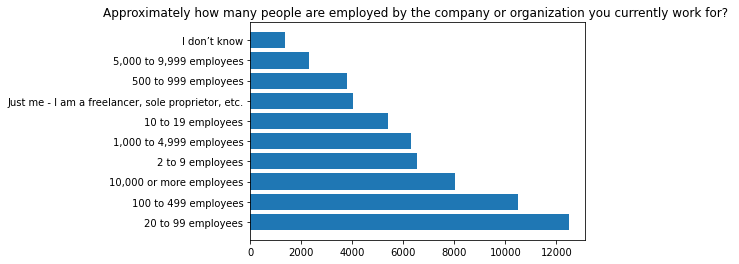

In [14]:
quickbar(df['OrgSize'])

most people work in a medium sized company: having 20-499 amount of workforce.

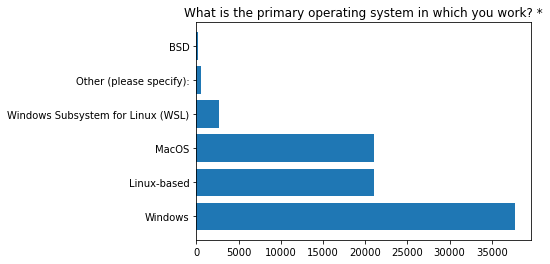

In [16]:
quickbar(df['OpSys'])

even though linux users are quite high in the sample, still many respondents use windows.

In [17]:
df['NEWStuck']

0        Call a coworker or friend;Visit Stack Overflow...
1                           Visit Stack Overflow;Google it
2        Visit Stack Overflow;Google it;Watch help / tu...
3        Call a coworker or friend;Visit Stack Overflow...
4        Visit Stack Overflow;Go for a walk or other ph...
                               ...                        
83434                  Call a coworker or friend;Google it
83435    Call a coworker or friend;Visit Stack Overflow...
83436    Call a coworker or friend;Visit Stack Overflow...
83437    Call a coworker or friend;Visit Stack Overflow...
83438    Call a coworker or friend;Visit Stack Overflow...
Name: NEWStuck, Length: 83439, dtype: object

In [18]:
df['NEWSOSites']

0                                           Stack Overflow
1                                           Stack Overflow
2                            Stack Overflow;Stack Exchange
3                                           Stack Overflow
4                            Stack Overflow;Stack Exchange
                               ...                        
83434                        Stack Overflow;Stack Exchange
83435                        Stack Overflow;Stack Exchange
83436                        Stack Overflow;Stack Exchange
83437                                       Stack Overflow
83438    Stack Overflow;Stack Exchange;Stack Overflow f...
Name: NEWSOSites, Length: 83439, dtype: object

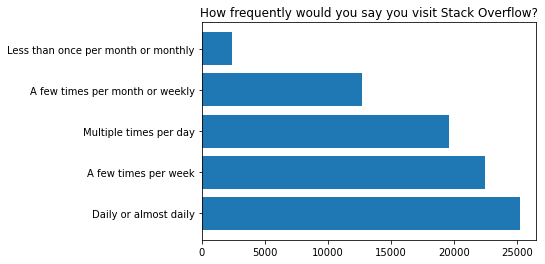

In [19]:
quickbar(df['SOVisitFreq'])

The largest group access stack overflow daily, and even a significant percentage of respondents use the site multiple times per day. but many use the site a few times per week or a few times per month. finally, there are only a handful of people declared that they use the site once per month because those who rarely use the site will rarely participate in the survey.

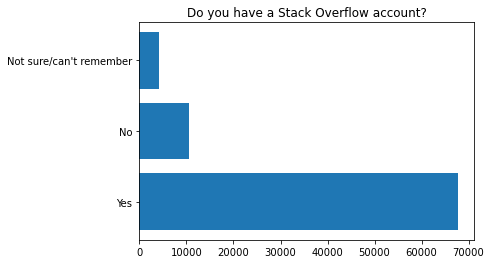

In [20]:
quickbar(df['SOAccount'])

it's interesting that they got people who don't have account to participate in the survey.

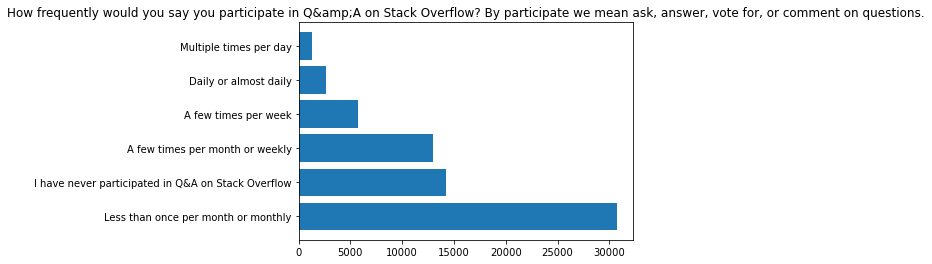

In [21]:
quickbar(df['SOPartFreq'])

contrary to the visit frequency, it is very rare to find someone ask a question daily on stack overflow. the majority asks question less than once a month, which is a total inverse of the visit frequency result. this indicates that even though people often visit stackoverflow, they rarely open an inquiry there.

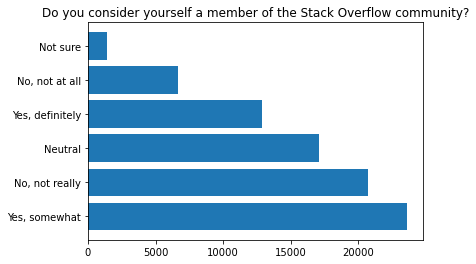

In [22]:
quickbar(df['SOComm'])

the result is somewhat interesting. from the looks of it, this indicates that many people tend towards neutrality when asked whether they feel like a member of the site community. However, this may indicate another problem that people will go towards the neutral when filling surveys. this is why some surveys left "neutral" options altogether.

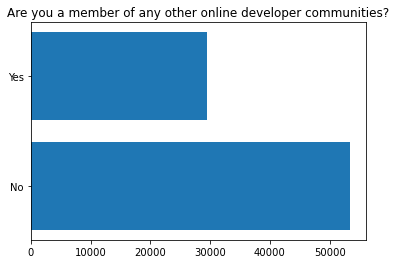

In [24]:
quickbar(df['NEWOtherComms'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

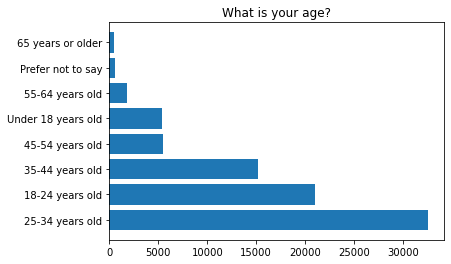

In [28]:
quickbar(df['Age'])

most people are between 25-34 years old and this indicates that stack overflow community is older than kaggle community.

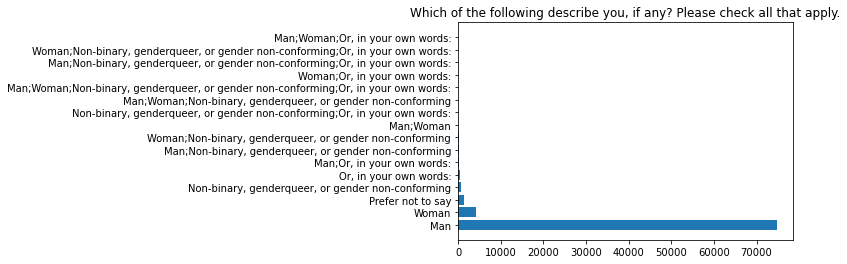

In [30]:
quickbar(df['Gender'])

this is a multiple choice answer.

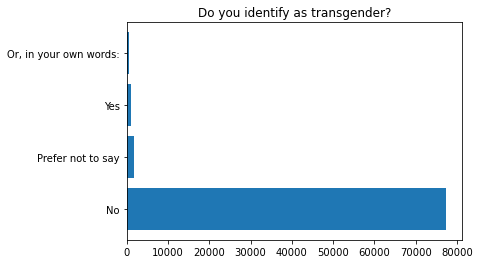

In [34]:
quickbar(df['Trans'])

In [39]:
df['Sexuality'].value_counts()

Straight / Heterosexual                                                           61094
Prefer not to say                                                                  4783
Bisexual                                                                           2879
Gay or Lesbian                                                                     1367
Prefer to self-describe:                                                           1258
Straight / Heterosexual;Bisexual                                                    492
Queer                                                                               376
Bisexual;Queer                                                                      273
Straight / Heterosexual;Prefer to self-describe:                                    225
Gay or Lesbian;Queer                                                                149
Straight / Heterosexual;Queer                                                        78
Bisexual;Gay or Lesbian         

In [38]:
df['Ethnicity'].value_counts()

White or of European descent                                                                                              42671
South Asian                                                                                                                8328
Hispanic or Latino/a/x                                                                                                     3585
Southeast Asian                                                                                                            3224
Prefer not to say                                                                                                          3062
                                                                                                                          ...  
Hispanic or Latino/a/x;Middle Eastern;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)        1
I don't know;Multiracial;Middle Eastern;Biracial                                                        

In [41]:
df['Accessibility'].value_counts()

None of the above                                                                                                                                                                                           72725
Prefer not to say                                                                                                                                                                                            1918
I am blind / have difficulty seeing                                                                                                                                                                          1030
Or, in your own words:                                                                                                                                                                                        842
I am deaf / hard of hearing                                                                                                                                     

In [43]:
df['MentalHealth'].value_counts()

None of the above                                                                                                                                                                                                                                    56459
Prefer not to say                                                                                                                                                                                                                                     3932
I have a concentration and/or memory disorder (e.g. ADHD)                                                                                                                                                                                             3059
I have an anxiety disorder                                                                                                                                                                                                                            2

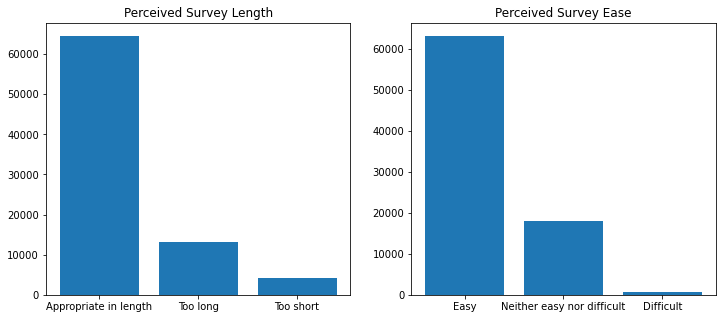

In [58]:
svlength = df['SurveyLength'].value_counts()
svease = df['SurveyEase'].value_counts()

f, ax = plt.subplot_mosaic([[0,1]], figsize=(12,5))
ax[0].bar(svlength.index, svlength.array)
ax[0].set_title('Perceived Survey Length')
ax[1].bar(svease.index, svease.array)
ax[1].set_title('Perceived Survey Ease')
plt.show()

<AxesSubplot:>

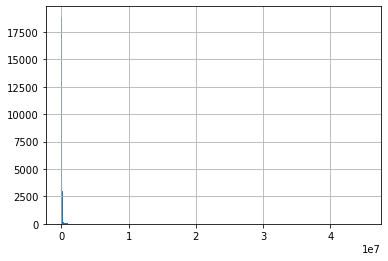

In [50]:
df['ConvertedCompYearly'].hist(bins=1000)

it skews highly to the right. looks like we need to apply some kind of transformations.